In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

# Question 1.a) Use python to download its historical daily data via Yahoo Finance.

In [101]:
ETH_USD_data = yf.download('ETH-USD', start='2021-03-01', end='2022-03-01')

[*********************100%***********************]  1 of 1 completed


In [102]:
ETH_USD_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-25,2598.436279,2821.972412,2579.208008,2764.535645,2764.535645,17208902048
2022-02-26,2764.989502,2849.424072,2745.009033,2781.111816,2781.111816,11724648351
2022-02-27,2780.504395,2831.125488,2581.615723,2621.801758,2621.801758,16150857254
2022-02-28,2621.172119,2929.180420,2586.388184,2919.201172,2919.201172,19266124733
2022-03-01,2919.775879,3029.651611,2868.938965,2972.485107,2972.485107,18757425786


In [5]:
ETH_GBP_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,1014.123291,1125.582764,1013.110107,1123.348999,1123.348999,17253871816
2021-03-02,1122.886475,1147.048950,1046.792725,1069.633301,1069.633301,16140912196
2021-03-03,1068.803711,1181.384155,1061.991455,1131.976318,1131.976318,16287884507
2021-03-04,1131.093140,1164.229248,1088.142578,1109.797485,1109.797485,16486747665
2021-03-05,1109.529297,1118.787720,1047.472412,1108.232788,1108.232788,15227081000


In [103]:
##Normal daily return
import numpy as np
normal_return = []
for i in range(0,len(ETH_USD_data)-1):
    adjclose_yesterday = ETH_USD_data.iloc[i]['Adj Close']
    adjclose_today = ETH_USD_data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.04607817782453463,
 0.05577106790286872,
 -0.021536805498695563,
 -0.005602958730816202,
 0.07922032955620155]

In [104]:
##Log return
log_return = []
for i in range(0,len(ETH_USD_data)-1):
    adjclose_yesterday = ETH_USD_data.iloc[i]['Adj Close']
    adjclose_today = ETH_USD_data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.047173558296895124,
 0.05427137002269247,
 -0.021772107057521358,
 -0.005618714183079258,
 0.07623886335092327]

The annulized normal return is 1.12888001 and its annulized volatility is 0.98356271
The annulized log return is 0.64169934 and its annulized volatility is 0.99098769


<Figure size 432x288 with 0 Axes>

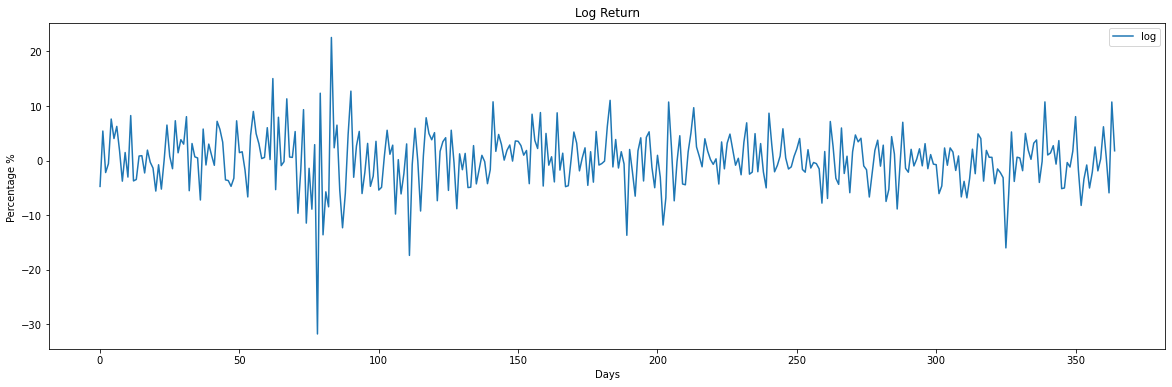

In [105]:
#Annualized volatility

dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))


dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

fig = plt.figure()
big_graph = dflr * 100
#plt.plot(dflr * 100)
big_graph.plot(figsize=(20, 6))
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');


In [106]:
log_return = np.log(ETH_USD_data['Adj Close'] / ETH_USD_data['Adj Close'].shift(1))
vol_h = np.sqrt(365) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')
#for conformation of sigma from above code.

The annualised volatility is 99.1 %


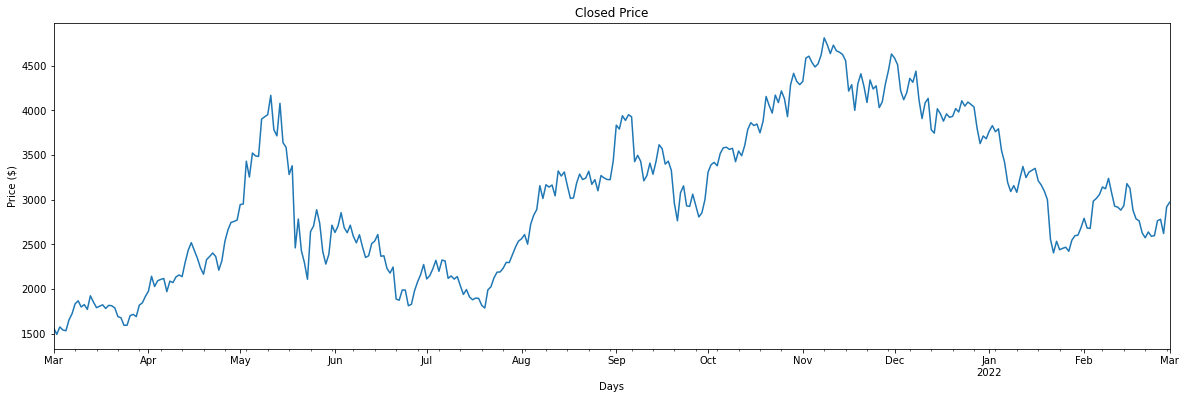

In [108]:
#movement (shape) of the cryptocurrency 
fig = plt.figure()
closed_price =  ETH_USD_data['Close']
closed_price.plot(figsize=(20, 6))
#plt.plot(ETH_USD_data['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');

<AxesSubplot:xlabel='Date'>

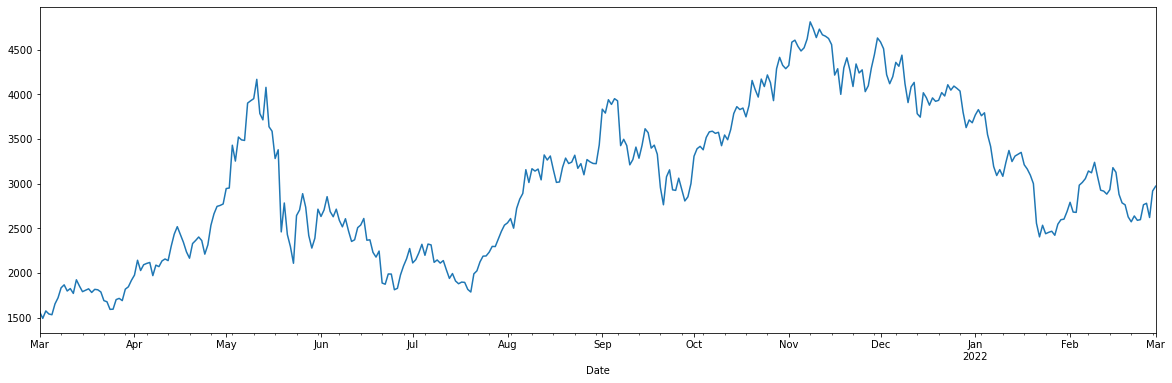

In [109]:
#movement (shape) of the cryptocurrency 
ADJ =  ETH_USD_data['Adj Close']
ADJ.plot(figsize=(20, 6))

In [110]:
#Statistical discription of the data
ETH_USD_data.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,366.00,366.00,366.00,366.00,366.00,3.660000e+02
mean,3021.72,3124.31,2904.72,3025.14,3025.14,2.375455e+10
std,846.43,860.59,826.44,840.55,840.55,1.099366e+10
min,1417.15,1547.88,1416.42,1492.61,1492.61,9.054964e+09
25%,2322.24,2431.50,2172.35,2326.06,2326.06,1.658344e+10
50%,3002.04,3141.03,2879.44,3001.40,3001.40,2.125133e+10
75%,3740.40,3836.70,3593.97,3737.87,3737.87,2.737119e+10
max,4810.07,4891.70,4718.04,4812.09,4812.09,8.448291e+10


# Binomial tree

In [630]:
#Binomial price tree
#Step 1: Creating the binomial price tree

S0 = 2972.48        # spot price of ETH_USD -> Adj.price of 2022-03-01
K = 3500             # strike price #change it to 3500 
T = 0.019               # maturity - 1/52 (one week) 
r = 1.62                 # risk free rate -> https://www.bloomberg.com/markets/rates-bonds/government-bonds/us [accessed:02-04-2022 00:47]
sig = 0.99               # diffusion coefficient or volatility (Historical log return)
N = 4                    # number of periods or number of time steps  
payoff = "call"          # payoff 

In [631]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [632]:
#constructing tree for underlying asset price
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1
S

array([[2972.48      , 3182.37464726, 3407.09050878, 3647.67414956,
        3905.24603531],
       [   0.        , 2776.42902855, 2972.48      , 3182.37464726,
        3407.09050878],
       [   0.        ,    0.        , 2593.30866838, 2776.42902855,
        2972.48      ],
       [   0.        ,    0.        ,    0.        , 2422.26607644,
        2593.30866838],
       [   0.        ,    0.        ,    0.        ,    0.        ,
        2262.50465925]])

In [637]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
print('The value of risk neutral up probability is', p.round(2))
print('The value of risk neutral down probability is', q.round(2))

The value of risk neutral up probability is 0.54
The value of risk neutral down probability is 0.46


In [638]:
#Finding option value at each final node
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ,
        405.24603531],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ]])

In [640]:
#Step 3: Finding option value at earlier nodes
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V
print('The value of European call option ' + payoff, str( V[0,0]))

The value of European call option call 33.293147831153924


# Monte Carlo Simulation

In [643]:
S0 = 2972.48        # spot price of ETH_USD -> Adj.price of 2022-03-01
K = 3500             # strike price #change it to 3500 
T = 0.019               # maturity - 1/52 (one week) 
r = 1.62                 # risk free rate -> https://www.bloomberg.com/markets/rates-bonds/government-bonds/us [accessed:02-04-2022 00:47]
sigma = 0.99               # diffusion coefficient or volatility (Historical log return)

def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [644]:
S = mcs_simulation_np(10000)

In [645]:
S = np.transpose(S)
S

array([[2972.48      , 2970.71712716, 2971.44657394, ..., 2478.73489445,
        2480.79465207, 2482.24443214],
       [2972.48      , 2963.72696063, 2960.33697692, ..., 2445.22390041,
        2446.49339305, 2442.63841776],
       [2972.48      , 2968.98359589, 2963.409778  , ..., 2802.74476516,
        2803.47129924, 2803.76439785],
       ...,
       [2972.48      , 2971.77390987, 2972.57500596, ..., 3799.56325758,
        3802.74801653, 3800.29697448],
       [2972.48      , 2970.67917273, 2976.68867682, ..., 2811.86327393,
        2810.94828837, 2810.92300137],
       [2972.48      , 2974.00114496, 2972.81628083, ..., 2827.70155699,
        2827.16442492, 2827.45960022]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

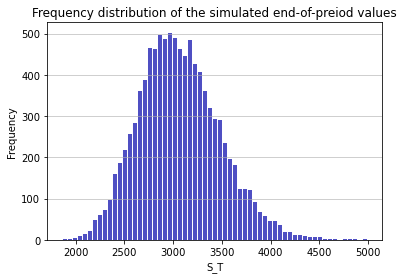

In [646]:
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [647]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call for Monte carlo simulation', str(c))

European call for Monte carlo simulation 36.88432007963938


# BSM

In [648]:


def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value



In [651]:
euro_option_bsm(2972.48, 3500, 0.019, 1.62, 0, 0.99, 'call')

#S0 = 2972.48        # spot price of ETH_USD -> Adj.price of 2022-03-01
#K = 3500             # strike price #change it to 3500 
#T = 1/52               # maturity - 1/52 (one week) 
#r = 1.62                 # risk free rate -> https://www.bloomberg.com/markets/rates-bonds/government-bonds/us [accessed:02-04-2022 00:47]
#sigma = 0.99               # diffusion coefficient or volatility (Historical log return)

38.05169533064975

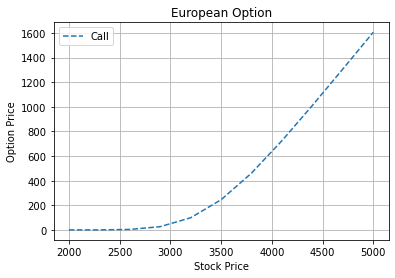

In [654]:
S = np.linspace(2000,5000,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bsm(S[i], 3500, 0.019, 1.62, 0, 0.99, 'call')
    
fig = plt.figure()
plt.plot(S, Call, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call'])

# Delta

In [552]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    return delta

In [553]:
d = delta(2972.48, 3500, 0.019, 1.62, 0, 0.99, 'call')
print('The value of Delta is', d.round(4),'.','If the price increase 1 dollar, then the value of the option will increase $',d.round(4),'.')
#Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. 
#Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.


The value of Delta is 0.1832 . If the price increase 1 dollar, then the value of the option will increase $ 0.1832 .


In [554]:
S = np.linspace(1500, 4000, 51)
T = np.linspace(0, 3, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 3500, T[i], 1.62, 0, 0.99, 'call')

C:\Users\Samson\AppData\Local\Temp/ipykernel_27628/3011456214.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
C:\Users\Samson\AppData\Local\Temp/ipykernel_27628/3011456214.py:3: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))


C:\Users\Samson\AppData\Local\Temp/ipykernel_27628/2931004091.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
C:\Users\Samson\AppData\Local\Temp/ipykernel_27628/2931004091.py:4: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)


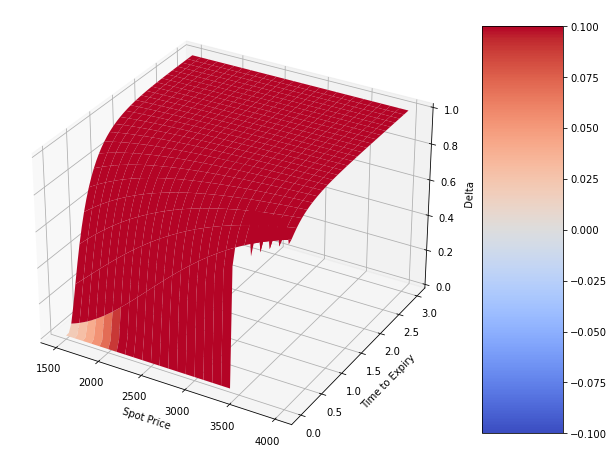

In [555]:
fig = plt.figure(figsize=(10, 15))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Spot Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Gamma

In [608]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    return gamma


In [615]:
ga = gamma(2972.48, 3500, 0.019, 1.62, 0, 0.99, 'call')
print('The value of Gamma is', ga.round(4))
#Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. 
#Gamma is the second derivative of the value function with respect to the underlying price.

The value of Gamma is 0.0007


# Speed

In [617]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [618]:
sp = speed(2972.48, 3500, 0.019, 1.62, 0, 0.99, 'call')
print('The value of Speed for call option is', sp)
#Speed measures the rate of change in Gamma with respect to changes in the underlying price.

The value of Speed for call option is 1.7043501255176626e-07


In [619]:
S = np.linspace(2000, 5000, 51)
T = np.linspace(0, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 3500, T[i], 1.62, 0, 0.99, 'call')

C:\Users\Samson\AppData\Local\Temp/ipykernel_27628/3198024367.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
C:\Users\Samson\AppData\Local\Temp/ipykernel_27628/3198024367.py:4: RuntimeWarning: invalid value encountered in double_scalars
  speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
C:\Users\Samson\AppData\Local\Temp/ipykernel_27628/3198024367.py:3: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))


C:\Users\Samson\AppData\Local\Temp/ipykernel_27628/3266122791.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


MemoryError: Unable to allocate 333. TiB for an array with shape (6765201, 6765201) and data type float64

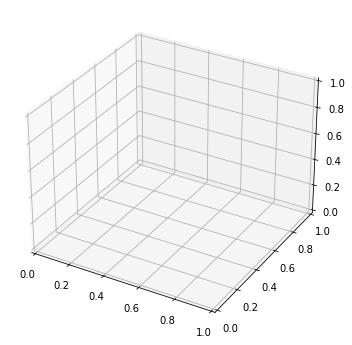

In [623]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Spot Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

C:\Users\Samson\AppData\Local\Temp/ipykernel_27628/1603304871.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
C:\Users\Samson\AppData\Local\Temp/ipykernel_27628/1603304871.py:4: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)


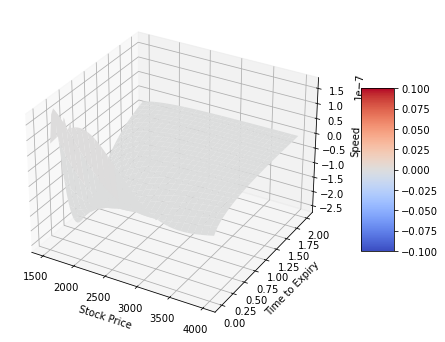

In [536]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Theta

In [501]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    return theta

In [524]:
th = theta(2972.48, 3500, 0.019, 1.62, 0, 0.99, 'call')
print('The value of Theta for call option is', th.round(2))

The value of Theta for call option is 3652.09


In [522]:
S = np.linspace(1500, 4000, 51)
T = np.linspace(0, 3, 50)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 3500, T[i], 1.62, 0, 0.99, 'call')

C:\Users\Samson\AppData\Local\Temp/ipykernel_27628/209644280.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
C:\Users\Samson\AppData\Local\Temp/ipykernel_27628/209644280.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
C:\Users\Samson\AppData\Local\Temp/ipykernel_27628/209644280.py:6: RuntimeWarning: invalid value encountered in double_scalars
  theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
C:\Users\Samson\AppData\Local\Temp/ipykernel_27628/209644280.py:3: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
C:\Users\Samson\AppData\Local\Temp/ipykernel_27628/209644280.py:4: RuntimeWa

C:\Users\Samson\AppData\Local\Temp/ipykernel_27628/383283098.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
C:\Users\Samson\AppData\Local\Temp/ipykernel_27628/383283098.py:4: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)


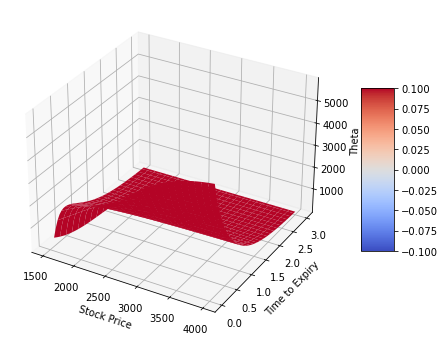

In [523]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Rho

In [91]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [506]:
rh = rho(2972.48, 3500, 0.019, 1.62, 0, 0.99, 'call')
print('The value of rho for call option is', rh.round(4))

The value of rho for call option is 9.6217


In [516]:
S = np.linspace(1500, 4000, 100)
r = np.linspace(0, 2, 11)
Rho = np.zeros((len(r),len(S)))
for j in range(len(S)):
    for i in range(len(r)):
        Rho[i,j] = rho(S[j], 3500, 0.019, r[i], 0, 0.99, 'call')

C:\Users\Samson\AppData\Local\Temp/ipykernel_27628/3619327709.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


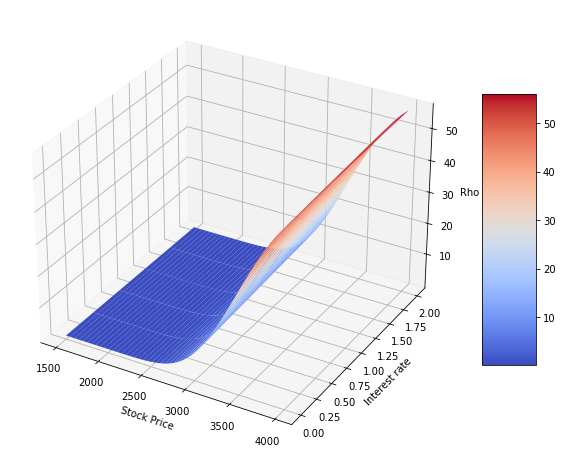

In [517]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
S, r = np.meshgrid(S, r)
surf = ax.plot_surface(S, r, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Interest rate')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Vega 

In [511]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [512]:
ve = vega(2972.48, 3500, 0.019, 1.62, 0, 0.99, 'call')
print('The value of Vega for call option is', ve.round(4))

The value of Vega for call option is 108.6921


In [514]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(2972.48, 3500, 0.019, 1.62, 0, vol[i], 'call')

C:\Users\Samson\AppData\Local\Temp/ipykernel_27628/3368267406.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


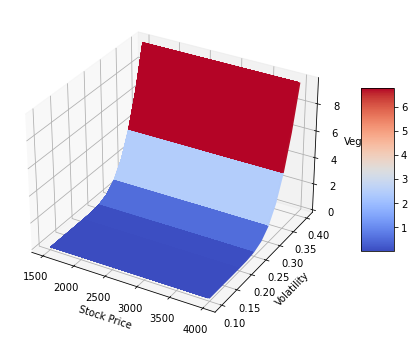

In [515]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, vol = np.meshgrid(S, vol)
surf = ax.plot_surface(S, vol, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Volatility')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);